In [1]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the data
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

# Separate features and labels
X = data.iloc[:, 1:].values  # pixel values
Y = data.iloc[:, 0].values   # labels (0-9)

# Normalize pixel values to be between 0 and 1
X = X / 255.0

# Convert labels to one-hot encoding
Y = to_categorical(Y)

# Split into training and development sets
X_train, X_dev, Y_train, Y_dev = train_test_split(X, Y, test_size=0.2, random_state=42)

In [2]:
# Custom initializer 1 (init_params equivalent)
def custom_initializer_1(shape, dtype=None):
    return tf.random.uniform(shape, minval=-0.5, maxval=0.5, dtype=dtype)

def custom_initializer_2(shape, dtype=None):
    if len(shape) == 1:
        return tf.random.normal(shape, mean=0, stddev=0.1, dtype=dtype)
    elif len(shape) == 2:
        stddev = 4 / (shape[0] + shape[1])
        return tf.random.normal(shape, mean=0, stddev=stddev, dtype=dtype)
    else:
        raise ValueError(f"Expected shape with 1 or 2 dimensions, got {shape}")



# Build a shallow neural network with custom initializers
def build_model(custom_initializer):
    model = tf.keras.models.Sequential()
    
    # Add the input layer explicitly
    model.add(tf.keras.layers.Input(shape=(784,)))

    # Add the input and hidden layers with the custom initializer
    model.add(tf.keras.layers.Dense(units=10, activation='relu', 
                                    kernel_initializer=custom_initializer, 
                                    bias_initializer=custom_initializer))
    
    # Add the output layer with the custom initializer
    model.add(tf.keras.layers.Dense(units=10, activation='softmax', 
                                    kernel_initializer=custom_initializer, 
                                    bias_initializer=custom_initializer))
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

Training model with Initializer 1 (Uniform)
Epoch 1/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4636 - loss: 1.5635 - val_accuracy: 0.8589 - val_loss: 0.4619
Epoch 2/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8768 - loss: 0.4199 - val_accuracy: 0.8915 - val_loss: 0.3657
Epoch 3/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9006 - loss: 0.3451 - val_accuracy: 0.9042 - val_loss: 0.3283
Epoch 4/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9102 - loss: 0.3048 - val_accuracy: 0.9143 - val_loss: 0.3070
Epoch 5/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9174 - loss: 0.2851 - val_accuracy: 0.9174 - val_loss: 0.2898
Epoch 6/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9256 - loss: 0.2649 - val_accuracy: 0.9194 - val_loss: 0.2809
Epoch 7/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9304 - loss: 0.2380 - val_accuracy: 0.9219 - val_loss: 0.2734
Epoch 8/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2

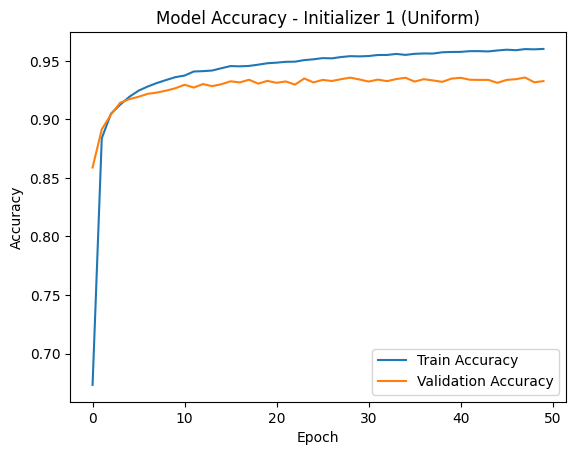

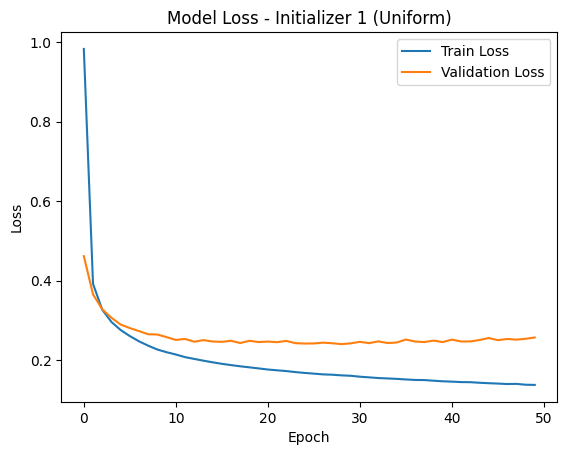

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9339 - loss: 0.2569
Accuracy on development set with Initializer 1 (Uniform): 93.27%
Training model with Initializer 2 (Normal)
Epoch 1/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6520 - loss: 1.1292 - val_accuracy: 0.8945 - val_loss: 0.3810
Epoch 2/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8965 - loss: 0.3604 - val_accuracy: 0.9083 - val_loss: 0.3290
Epoch 3/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9072 - loss: 0.3153 - val_accuracy: 0.9099 - val_loss: 0.3153
Epoch 4/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9144 - loss: 0.2985 - val_accuracy: 0.9123 - val_loss: 0.3096
Epoch 5/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9211 - loss: 0.2756 - val_accuracy: 0.9157 - val_loss: 0.3037
Epoch 6/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9236 - loss: 0.2728 - val_accuracy: 0.9144 - val_loss: 0.2942
Epoch 7/50
1050/1050 ━━━━━━━━━━━━━━━━

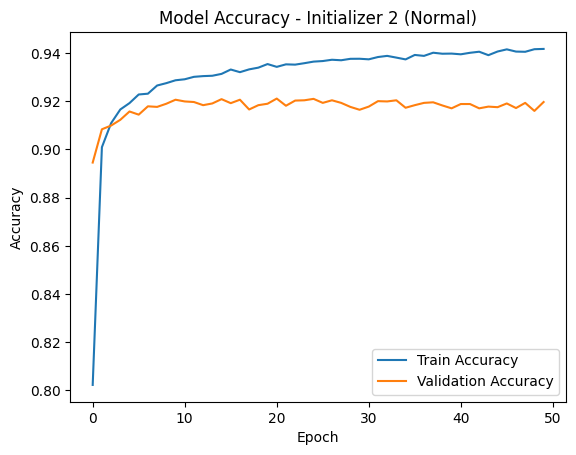

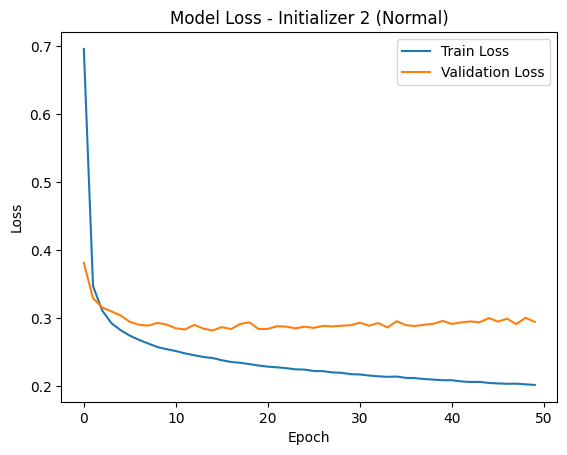

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9189 - loss: 0.3037
Accuracy on development set with Initializer 2 (Normal): 91.96%


In [3]:
# Train and evaluate with both custom initializations
initializers = {'Initializer 1 (Uniform)': custom_initializer_1, 
                'Initializer 2 (Normal)': custom_initializer_2}

for name, initializer in initializers.items():
    print(f"Training model with {name}")
    
    # Build model with the current initializer
    model = build_model(initializer)
    
    # Train the model
    history = model.fit(X_train, Y_train, epochs=50, validation_data=(X_dev, Y_dev), batch_size=32)
    
    # Plot accuracy
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model Accuracy - {name}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc="best")
    plt.show()
    
    # Plot loss
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss - {name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc="best")
    plt.show()

    # Evaluate the model on the development set
    dev_loss, dev_accuracy = model.evaluate(X_dev, Y_dev)
    print(f"Accuracy on development set with {name}: {dev_accuracy * 100:.2f}%")

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9189 - loss: 0.3037
Accuracy on development set: 91.96%


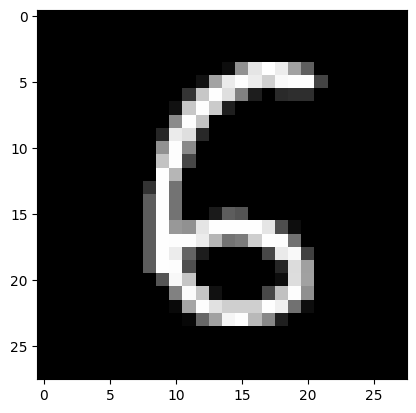

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Prediction: 6, True Label: 6


In [4]:
    # Evaluate the model on the development set
    dev_loss, dev_accuracy = model.evaluate(X_dev, Y_dev)
    print(f"Accuracy on development set: {dev_accuracy * 100:.2f}%")

    # Predict a sample and visualize
    index = 5  # Pick a sample index
    current_image = X_dev[index].reshape(28, 28)  # Reshape from 784 to 28x28

    # Display the image
    plt.imshow(current_image, cmap='gray')
    plt.show()

    # Make a prediction
    prediction = np.argmax(model.predict(X_dev[index].reshape(1, 784)))
    true_label = np.argmax(Y_dev[index])

    print(f"Prediction: {prediction}, True Label: {true_label}")